In [1]:
import rioxarray
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
from datetime import datetime

## Reading the Data

In [2]:
fn = 'adaptor.mars.internal-1666668778.776454-23021-16-6266c761-a40a-44a4-880c-6c7720f55b68.nc'
arr = rioxarray.open_rasterio(fn)
arr

<xarray.DataArray 't2m' (time: 780, y: 1801, x: 3600)>
[5057208000 values with dtype=int16]
Coordinates:
  * time         (time) object 1950-01-01 00:00:00 ... 2014-12-01 00:00:00
  * x            (x) float64 0.0 0.1 0.2 0.3 0.4 ... 359.6 359.7 359.8 359.9
  * y            (y) float64 90.0 89.9 89.8 89.7 ... -89.7 -89.8 -89.9 -90.0
    spatial_ref  int64 0
Attributes: (12/15)
    latitude#long_name:      latitude
    latitude#units:          degrees_north
    longitude#long_name:     longitude
    longitude#units:         degrees_east
    Conventions:             CF-1.6
    history:                 2022-10-25 03:36:23 GMT by grib_to_netcdf-2.25.1...
    ...                      ...
    add_offset:              257.003199580373
    long_name:               2 metre temperature
    missing_value:           -32767
    scale_factor:            0.0017642914023725403
    units:                   ('K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K...
    _FillValue:              -32767

In [3]:
arr.dtype

dtype('int16')

## Data Pre-processing

### Handling Missing Values

In [4]:
# handling missing values
arr = arr.where(arr != -32767)
arr

<xarray.DataArray 't2m' (time: 780, y: 1801, x: 3600)>
array([[[    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        ...,
        [ -6497.,  -6497.,  -6497., ...,  -6497.,  -6497.,  -6497.],
        [ -6497.,  -6497.,  -6498., ...,  -6498.,  -6498.,  -6497.],
        [ -6449.,  -6449.,  -6449., ...,  -6449.,  -6449.,  -6449.]],

       [[    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        ...,
        [-13727., -13727., -13727., ..., -13728., -13728., -13727.],
        [-13731., -13731., -13731., ..., -13732., -13732., -13732.],
        [-13986., -13986., -13986., ..., -13986., -13986., -13986.]],

       [[    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        ...,
...
        ...,
        [-17536., -17536., -17536., ..., -17537., -17537., -17537.],
        [-17537., -17537., -17537., ..., -17538., -17538., -17538.],
        [-17840., -17840., -17840., ..., -17840., -17840., -17840.]],

       [[    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        ...,
        [-12207., -12207., -12207., ..., -12208., -12208., -12207.],
        [-12209., -12209., -12209., ..., -12209., -12209., -12209.],
        [-12619., -12619., -12619., ..., -12619., -12619., -12619.]],

       [[    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        ...,
        [ -7615.,  -7615.,  -7615., ...,  -7615.,  -7615.,  -7615.],
        [ -7618.,  -7618.,  -7618., ...,  -7618.,  -7618.,  -7618.],
        [ -7817.,  -7817.,  -7817., ...,  -7817.,  -7817.,  -7817.]]])
Coordinates:
  * time         (time) object 1950-01-01 00:00:00 ... 2014-12-01 00:00:00
  * x            (x) float64 0.0 0.1 0.2 0.3 0.4 ... 359.6 359.7 359.8 359.9
  * y            (y) float64 90.0 89.9 89.8 89.7 ... -89.7 -89.8 -89.9 -90.0
    spatial_ref  int64 0
Attributes: (12/15)
    latitude#long_name:      latitude
    latitude#units:          degrees_north
    longitude#long_name:     longitude
    longitude#units:         degrees_east
    Conventions:             CF-1.6
    history:                 2022-10-25 03:36:23 GMT by grib_to_netcdf-2.25.1...
    ...                      ...
    add_offset:              257.003199580373
    long_name:               2 metre temperature
    missing_value:           -32767
    scale_factor:            0.0017642914023725403
    units:                   ('K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K...
    _FillValue:              -32767

In [5]:
arr.dtype

dtype('float64')

### Coarsening

In [6]:
arr_lowx = arr.coarsen(x=9, boundary="trim").mean()
arr_lowx

<xarray.DataArray 't2m' (time: 780, y: 1801, x: 400)>
array([[[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        ...,
        [ -6497.33333333,  -6498.33333333,  -6499.55555556, ...,
          -6499.66666667,  -6498.44444444,  -6497.44444444],
        [ -6497.77777778,  -6498.55555556,  -6499.22222222, ...,
          -6499.77777778,  -6498.88888889,  -6497.88888889],
        [ -6449.        ,  -6449.        ,  -6449.        , ...,
          -6449.        ,  -6449.        ,  -6449.        ]],

       [[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
...
        [-12207.        , -12207.22222222, -12208.        , ...,
         -12214.11111111, -12210.44444444, -12208.33333333],
        [-12209.        , -12209.        , -12209.55555556, ...,
         -12215.33333333, -12212.44444444, -12209.88888889],
        [-12619.        , -12619.        , -12619.        , ...,
         -12619.        , -12619.        , -12619.        ]],

       [[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        ...,
        [ -7615.44444444,  -7616.88888889,  -7618.55555556, ...,
          -7616.11111111,  -7615.33333333,  -7615.        ],
        [ -7618.33333333,  -7619.44444444,  -7620.66666667, ...,
          -7619.        ,  -7618.77777778,  -7618.        ],
        [ -7817.        ,  -7817.        ,  -7817.        , ...,
          -7817.        ,  -7817.        ,  -7817.        ]]])
Coordinates:
  * time         (time) object 1950-01-01 00:00:00 ... 2014-12-01 00:00:00
  * x            (x) float64 0.4 1.3 2.2 3.1 4.0 ... 356.8 357.7 358.6 359.5
  * y            (y) float64 90.0 89.9 89.8 89.7 ... -89.7 -89.8 -89.9 -90.0
    spatial_ref  int64 0
Attributes: (12/15)
    latitude#long_name:      latitude
    latitude#units:          degrees_north
    longitude#long_name:     longitude
    longitude#units:         degrees_east
    Conventions:             CF-1.6
    history:                 2022-10-25 03:36:23 GMT by grib_to_netcdf-2.25.1...
    ...                      ...
    add_offset:              257.003199580373
    long_name:               2 metre temperature
    missing_value:           -32767
    scale_factor:            0.0017642914023725403
    units:                   ('K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K...
    _FillValue:              -32767

In [7]:
arr_low = arr_lowx.coarsen(y=9, boundary="trim").mean()
arr_low

<xarray.DataArray 't2m' (time: 780, y: 200, x: 400)>
array([[[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        ...,
        [ -6707.32098765,  -6741.96296296,  -6776.86419753, ...,
          -6642.14814815,  -6661.69135802,  -6681.01234568],
        [ -6722.25925926,  -6738.71604938,  -6754.75308642, ...,
          -6678.18518519,  -6692.45679012,  -6706.9382716 ],
        [ -6555.61728395,  -6557.9382716 ,  -6560.51851852, ...,
          -6553.        ,  -6553.54320988,  -6554.2345679 ]],

       [[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
...
        [-11633.75308642, -11655.51851852, -11677.40740741, ...,
         -11594.39506173, -11605.9382716 , -11617.62962963],
        [-11910.2962963 , -11921.80246914, -11933.30864198, ...,
         -11876.28395062, -11887.50617284, -11898.69135802],
        [-12098.55555556, -12098.01234568, -12097.44444444, ...,
         -12102.55555556, -12100.87654321, -12099.45679012]],

       [[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        ...,
        [ -6888.61728395,  -6912.38271605,  -6936.16049383, ...,
          -6842.39506173,  -6856.40740741,  -6870.35802469],
        [ -7229.98765432,  -7242.72839506,  -7255.56790123, ...,
          -7192.72839506,  -7204.96296296,  -7217.40740741],
        [ -7506.92592593,  -7509.80246914,  -7512.61728395, ...,
          -7501.54320988,  -7503.04938272,  -7504.88888889]]])
Coordinates:
  * time         (time) object 1950-01-01 00:00:00 ... 2014-12-01 00:00:00
  * x            (x) float64 0.4 1.3 2.2 3.1 4.0 ... 356.8 357.7 358.6 359.5
  * y            (y) float64 89.6 88.7 87.8 86.9 ... -86.8 -87.7 -88.6 -89.5
    spatial_ref  int64 0
Attributes: (12/15)
    latitude#long_name:      latitude
    latitude#units:          degrees_north
    longitude#long_name:     longitude
    longitude#units:         degrees_east
    Conventions:             CF-1.6
    history:                 2022-10-25 03:36:23 GMT by grib_to_netcdf-2.25.1...
    ...                      ...
    add_offset:              257.003199580373
    long_name:               2 metre temperature
    missing_value:           -32767
    scale_factor:            0.0017642914023725403
    units:                   ('K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K...
    _FillValue:              -32767

In [8]:
arr_low = (arr_low * arr.scale_factor) + arr.add_offset #real_value = (Display_Value * scale_factor) + add_offset
arr_low

<xarray.DataArray 't2m' (time: 780, y: 200, x: 400)>
array([[[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        ...,
        [245.16953083, 245.10841229, 245.04683634, ..., 245.28451471,
         245.25003479, 245.21594694],
        [245.14317536, 245.11414079, 245.08584678, ..., 245.22093487,
         245.1957556 , 245.17020605],
        [245.43718037, 245.43308547, 245.42853316, ..., 245.44179802,
         245.44083964, 245.43961988]],

       [[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
...
        [236.47786903, 236.43946847, 236.40085009, ..., 236.54730806,
         236.52694247, 236.50631551],
        [235.98996623, 235.96966598, 235.94936574, ..., 236.04997391,
         236.03017464, 236.01044072],
        [235.65782203, 235.65878041, 235.65978236, ..., 235.65076487,
         235.65372713, 235.65623199]],

       [[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        ...,
        [244.84967133, 244.80774218, 244.76579126, ..., 244.9312208 ,
         244.90649894, 244.88188599],
        [244.24739452, 244.22491614, 244.20226351, ..., 244.31313071,
         244.29154537, 244.26958974],
        [243.75879471, 243.75371965, 243.7487535 , ..., 243.76829139,
         243.76563406, 243.76238864]]])
Coordinates:
  * time         (time) object 1950-01-01 00:00:00 ... 2014-12-01 00:00:00
  * x            (x) float64 0.4 1.3 2.2 3.1 4.0 ... 356.8 357.7 358.6 359.5
  * y            (y) float64 89.6 88.7 87.8 86.9 ... -86.8 -87.7 -88.6 -89.5
    spatial_ref  int64 0

### Adding a New Dimention for Year

In [9]:
a = range(1950, 2015) # 65 years
numYear = len(a)
b = range(len(arr_low.time)//numYear)

In [10]:
ind = pd.MultiIndex.from_product([a, b], names=['year', 'new_time'])

In [11]:
arr_new = arr_low.assign_coords(time=ind).unstack('time')
arr_new = arr_new.rename({'new_time':'time'})
arr_new

<xarray.DataArray 't2m' (y: 200, x: 400, year: 65, time: 12)>
array([[[[         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         ...,
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan]],

        [[         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
...
         [241.92186242, 235.14970611, 228.07095516, ..., 226.88018915,
          238.41941727, 245.39915009],
         [244.35449355, 232.49666925, 225.95047292, ..., 226.41559241,
          239.77304262, 244.07621469],
         [243.49036104, 232.9099055 , 222.94353228, ..., 226.16434425,
          235.65372713, 243.76563406]],

        [[245.43961988, 233.25206913, 223.60862657, ..., 227.97513889,
          235.58271985, 243.7298037 ],
         [243.49127586, 235.6635941 , 229.11678789, ..., 224.79446999,
          237.86418823, 242.29754758],
         [241.9306621 , 235.11052141, 228.30044373, ..., 226.3897597 ,
          239.9573784 , 244.77014753],
         ...,
         [241.92227627, 235.15218919, 228.07208779, ..., 226.88517708,
          238.41628075, 245.39973818],
         [244.35662812, 232.49984933, 225.95702912, ..., 226.42439209,
          239.7759831 , 244.07871955],
         [243.48728987, 232.91380437, 222.95045875, ..., 226.16824311,
          235.65623199, 243.76238864]]]])
Coordinates:
  * year         (year) int64 1950 1951 1952 1953 1954 ... 2011 2012 2013 2014
  * time         (time) int64 0 1 2 3 4 5 6 7 8 9 10 11
  * x            (x) float64 0.4 1.3 2.2 3.1 4.0 ... 356.8 357.7 358.6 359.5
  * y            (y) float64 89.6 88.7 87.8 86.9 ... -86.8 -87.7 -88.6 -89.5
    spatial_ref  int64 0

In [12]:
arr_new = arr_new.transpose('year','time','y','x')
arr_new

<xarray.DataArray 't2m' (year: 65, time: 12, y: 200, x: 400)>
array([[[[         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         ...,
         [245.16953083, 245.10841229, 245.04683634, ..., 245.28451471,
          245.25003479, 245.21594694],
         [245.14317536, 245.11414079, 245.08584678, ..., 245.22093487,
          245.1957556 , 245.17020605],
         [245.43718037, 245.43308547, 245.42853316, ..., 245.44179802,
          245.44083964, 245.43961988]],

        [[         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
...
         [236.47786903, 236.43946847, 236.40085009, ..., 236.54730806,
          236.52694247, 236.50631551],
         [235.98996623, 235.96966598, 235.94936574, ..., 236.04997391,
          236.03017464, 236.01044072],
         [235.65782203, 235.65878041, 235.65978236, ..., 235.65076487,
          235.65372713, 235.65623199]],

        [[         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         ...,
         [244.84967133, 244.80774218, 244.76579126, ..., 244.9312208 ,
          244.90649894, 244.88188599],
         [244.24739452, 244.22491614, 244.20226351, ..., 244.31313071,
          244.29154537, 244.26958974],
         [243.75879471, 243.75371965, 243.7487535 , ..., 243.76829139,
          243.76563406, 243.76238864]]]])
Coordinates:
  * year         (year) int64 1950 1951 1952 1953 1954 ... 2011 2012 2013 2014
  * time         (time) int64 0 1 2 3 4 5 6 7 8 9 10 11
  * x            (x) float64 0.4 1.3 2.2 3.1 4.0 ... 356.8 357.7 358.6 359.5
  * y            (y) float64 89.6 88.7 87.8 86.9 ... -86.8 -87.7 -88.6 -89.5
    spatial_ref  int64 0

In [24]:
median = arr_new.quantile(q=0.5, dim='time')
median

<xarray.DataArray 't2m' (year: 65, y: 200, x: 400)>
array([[[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        ...,
        [223.15081473, 223.1101598 , 223.06929794, ..., 223.21734595,
         223.1983417 , 223.17933745],
        [222.82342977, 222.79337147, 222.76358544, ..., 222.90741876,
         222.87978908, 222.85202872],
        [222.92758831, 222.92820908, 222.92875361, ..., 222.925029  ,
         222.92625965, 222.9273705 ]],

       [[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
...
        [227.87239614, 227.83450744, 227.79622667, ..., 227.9250635 ,
         227.91122144, 227.89718334],
        [227.07434833, 227.05068286, 227.02719165, ..., 227.13487877,
         227.11562403, 227.09598812],
        [226.83254239, 226.83823822, 226.84385781, ..., 226.81122931,
         226.81879834, 226.82622579]],

       [[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        ...,
        [225.25475401, 225.21003685, 225.16523256, ..., 225.32616425,
         225.30570065, 225.28567268],
        [225.20211932, 225.17341147, 225.1453026 , ..., 225.27428102,
         225.25101851, 225.22785401],
        [225.43558299, 225.43406919, 225.43296923, ..., 225.42456162,
         225.4294951 , 225.43419987]]])
Coordinates:
  * year      (year) int64 1950 1951 1952 1953 1954 ... 2010 2011 2012 2013 2014
  * x         (x) float64 0.4 1.3 2.2 3.1 4.0 ... 355.9 356.8 357.7 358.6 359.5
  * y         (y) float64 89.6 88.7 87.8 86.9 86.0 ... -86.8 -87.7 -88.6 -89.5
    quantile  float64 0.5

## Calculating Annual Temperature Quantiles 

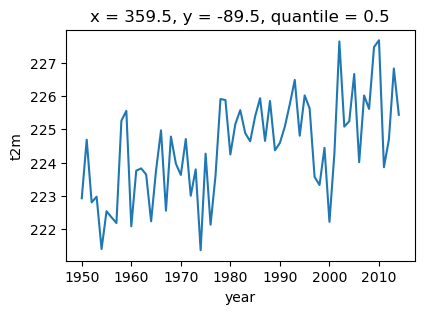

In [25]:
# plot - the median temperature near the South Pole over the years 1950-2015
fig, ax = plt.subplots(figsize=(4.5, 3))
median[:, -1, -1].plot()

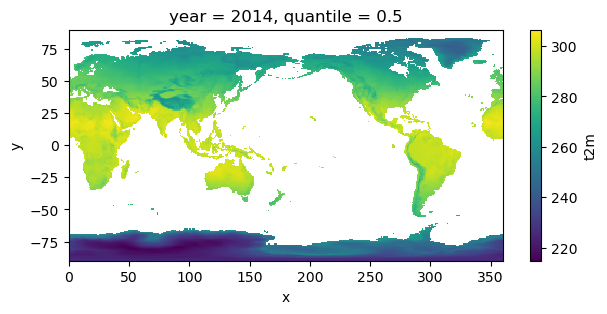

In [26]:
# heatmap - the median temperature (q=0.5) in 2014
fig, ax = plt.subplots(figsize=(7, 3))
median[-1, :, :].plot()

In [27]:
quantiles = arr_new.quantile(q=0, dim='time')
for i in range(100):
    quantiles = xr.concat([quantiles, arr_new.quantile(q=(i+1)/100, dim='time')], "quantile")
quantiles

<xarray.DataArray 't2m' (quantile: 101, year: 65, y: 200, x: 400)>
array([[[[         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         ...,
         [217.19967469, 217.13805518, 217.07684952, ..., 217.36244691,
          217.30940926, 217.25656765],
         [217.50796828, 217.48768982, 217.46802124, ..., 217.56268309,
          217.54517087, 217.52731014],
         [217.95790615, 217.9780757 , 217.99835416, ..., 217.89511044,
          217.91660866, 217.93760591]],

        [[         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
...
         [246.14649086, 246.11222875, 246.07726965, ..., 246.18532705,
          246.17620065, 246.16687822],
         [245.18856775, 245.17312476, 245.15785601, ..., 245.22679406,
          245.21464006, 245.20233358],
         [244.35813103, 244.35882804, 244.35972108, ..., 244.35166197,
          244.35449355, 244.35662812]],

        [[         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         ...,
         [244.84967133, 244.80774218, 244.76579126, ..., 244.9312208 ,
          244.90649894, 244.88188599],
         [244.24739452, 244.22491614, 244.20226351, ..., 244.31313071,
          244.29154537, 244.26958974],
         [243.75879471, 243.75371965, 243.7487535 , ..., 243.76829139,
          243.76563406, 243.76238864]]]])
Coordinates:
  * year      (year) int64 1950 1951 1952 1953 1954 ... 2010 2011 2012 2013 2014
  * x         (x) float64 0.4 1.3 2.2 3.1 4.0 ... 355.9 356.8 357.7 358.6 359.5
  * y         (y) float64 89.6 88.7 87.8 86.9 86.0 ... -86.8 -87.7 -88.6 -89.5
  * quantile  (quantile) float64 0.0 0.01 0.02 0.03 0.04 ... 0.97 0.98 0.99 1.0

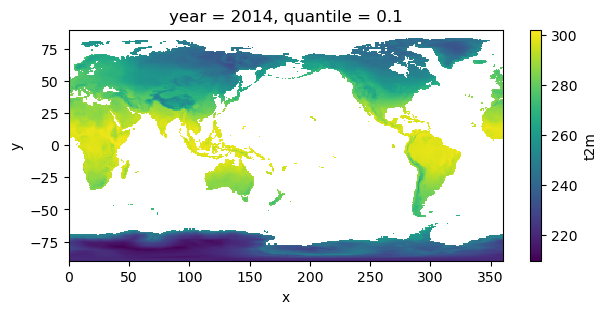

In [28]:
fig, ax = plt.subplots(figsize=(7, 3))
quantiles[10, -1, :, :].plot()